In [1]:
import pandas as pd
import os
import statsmodels.stats.multitest as multi
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

## Get Interaction data

In [4]:
def get_data(directory,cov_name):
    files=[x for x in os.listdir(directory) if ".glm.linear" in x]
    compiled=pd.DataFrame()
    for x in files:
        df=pd.read_csv(directory+"/"+x,delimiter="\t")
        df=df[df["TEST"].str.contains(cov_name)]
        df["pheno"]=x.split("_")[0]
        df["P"]=pd.to_numeric(df["P"])
        compiled=compiled.append(df)
    return(compiled)
    

In [5]:
age_interact=get_data("/cellar/users/mpagadal/Data/projects/germline-immune/cell-type-specificity/associations/age","ADDxage")
sex_interact=get_data("/cellar/users/mpagadal/Data/projects/germline-immune/cell-type-specificity/associations/sex","ADDxSEX")

## get association file

In [6]:
snps=pd.read_csv("/cellar/users/mpagadal/Data/projects/germline-immune/snp-tables/immune-microenvironment-nonhla.tsv",delimiter="\t")
snps["assoc"]=snps["snps"]+"_"+snps["file"]

## Age/Sex interaction

In [7]:
age_interact_filt=age_interact[["pheno","ID","P"]]
age_interact_filt.columns=["file","snps","ADDxage"]
sex_interact_filt=sex_interact[["pheno","ID","P"]]
sex_interact_filt.columns=["file","snps","ADDxSEX"]

In [8]:
snps=pd.merge(snps,age_interact_filt,on=["file","snps"],how="left")
snps=pd.merge(snps,sex_interact_filt,on=["file","snps"],how="left")

In [9]:
def fdr(df,P):
    probabilities = df[P].to_numpy()
    report = multi.multipletests(probabilities,
                alpha=0.05,
                method="fdr_bh",
                is_sorted=False,
            )
    discoveries = report[1]
    
    return(discoveries)

In [10]:
snps["fdr age"]=fdr(snps,"ADDxage")
snps["fdr sex"]=fdr(snps,"ADDxSEX")

/nrnb/opt/anaconda3.7/lib/python3.7/site-packages/statsmodels/stats/multitest.py:325: RuntimeWarning: invalid value encountered in less_equal
  reject = pvals_sorted <= ecdffactor*alpha


In [11]:
len(snps[snps["fdr age"]<.1])

0

In [12]:
len(snps[snps["fdr sex"]<.1])

0

## Cell interaction

In [13]:
def get_data(directory,cov_name):
    files=[x for x in os.listdir(directory) if ".glm.linear" in x]
    compiled=pd.DataFrame()
    for x in files:
        df=pd.read_csv(directory+"/"+x,delimiter="\t")
        df=df[df["TEST"].str.contains(cov_name)]
        df["pheno"]=x.split("_")[0]
        df["P"]=pd.to_numeric(df["P"])
        compiled=compiled.append(df)
    return(compiled)
    

In [14]:
cell_interact=get_data("/cellar/users/mpagadal/Data/projects/germline-immune/cell-type-specificity/associations/cell-type","ADDx")

In [15]:
cell_interact["assoc"]=cell_interact["ID"]+"_"+cell_interact["pheno"]

In [16]:
df_cell_interact=cell_interact.pivot_table(index="assoc",columns="TEST",values="P")

In [17]:
df_cell_interact=df_cell_interact.reset_index()

In [18]:
print(len(df_cell_interact["assoc"].unique()))
df_cell_interact.head()

57000


TEST,assoc,ADDxAdipocytes,ADDxAstrocytes,ADDxB.cells,ADDxBasophils,ADDxCD4..T.cells,ADDxCD4..Tcm,ADDxCD4..Tem,ADDxCD4..memory.T.cells,ADDxCD4..naive.T.cells,...,ADDxTh2.cells,ADDxTregs,ADDxaDC,ADDxcDC,ADDxiDC,ADDxly.Endothelial.cells,ADDxmv.Endothelial.cells,ADDxnaive.B.cells,ADDxpDC,ADDxpro.B.cells
0,10:110943735:G:A_ADCY7,0.609330,0.555889,0.777050,0.752144,0.323864,0.576929,0.892900,0.326085,0.545058,...,0.265986,0.212721,0.525139,0.608400,0.458000,0.627052,0.862602,0.830329,0.895003,0.592187
1,10:110943735:G:A_ALOX5AP,0.915385,0.288319,0.988210,0.259637,0.689596,0.096117,0.457380,0.583244,0.866994,...,0.156365,0.521489,0.170993,0.776735,0.566088,0.600513,0.710059,0.341174,0.591989,0.519954
2,10:110943735:G:A_AMPD3,0.865703,0.430386,0.494999,0.281982,0.387066,0.449829,0.335490,0.586712,0.646899,...,0.101017,0.043049,0.159728,0.167748,0.824458,0.515462,0.287518,0.218920,0.106559,0.086277
3,10:110943735:G:A_APITD1,0.108505,0.786143,0.231741,0.591988,0.073007,0.791040,0.248551,0.968337,0.995620,...,0.651321,0.068821,0.568021,0.950883,0.826446,0.276653,0.100331,0.750492,0.235271,0.940476
4,10:110943735:G:A_B2M,0.094987,0.481827,0.145618,0.724579,0.362241,0.202813,0.973427,0.113049,0.956000,...,0.514111,0.344652,0.193990,0.239862,0.115610,0.597373,0.515688,0.281291,0.047115,0.018940


In [19]:
snps=pd.read_csv("/cellar/users/mpagadal/Data/projects/germline-immune/snp-tables/immune-microenvironment-nonhla.tsv",delimiter="\t")
print(snps.shape)
snps["file"]=snps["file"].replace("CTSL1","CTSL")
snps["assoc"]=snps["snps"]+"_"+snps["file"]
snps.head()

(482, 19)


,snps,file,category,maf,variant,rsid,tpm beta,tpm SE,tpm P,REF,ALT,firebrowse beta,firebrowse SE,firebrowse P,pancan beta,pancan SE,pancan P,p-value,cis tss,assoc
0,19:7789796:T:C,CD209,cell type,0.25930,chr19:g.7789796T>C,rs10422720,-0.153826,0.018988,6.358100e-16,T,C,-0.174974,0.019221,1.126740e-19,-0.178179,0.018876,4.971470e-21,4.971470e-21,15084.0,19:7789796:T:C_CD209
1,19:7768298:A:G,CD209,cell type,0.15010,chr19:g.7768298A>G,rs58901714,-0.143563,0.023409,9.105090e-10,A,G,-0.157023,0.023889,5.293960e-11,-0.151253,0.023379,1.047650e-10,5.293960e-11,36582.0,19:7768298:A:G_CD209
2,3:159633885:T:C,CD209,cell type,0.01491,chr3:g.159633885T>C,rs76992466,-0.374997,0.068493,4.525630e-08,T,C,-0.340604,0.070042,1.182550e-06,-0.353152,0.068943,3.096210e-07,4.525630e-08,NaN,3:159633885:T:C_CD209
3,1:161508763:T:C,FCGR3B,cell type,0.36810,chr1:g.161508763T>C,rs10919544,0.166431,0.017210,5.489110e-22,T,C,0.237579,0.017299,2.300510e-42,0.236799,0.016959,9.737500e-44,9.737500e-44,84224.0,1:161508763:T:C_FCGR3B
4,1:161572353:T:C,FCGR3B,cell type,0.14500,chr1:g.161572353T>C,rs67775399,-0.136145,0.023202,4.615400e-09,T,C,-0.166241,0.023540,1.799250e-12,-0.163998,0.023030,1.174700e-12,1.174700e-12,20634.0,1:161572353:T:C_FCGR3B


In [20]:
df=pd.merge(snps,df_cell_interact,on="assoc",how="left")

In [21]:
cols=df.columns[22:].tolist()

In [22]:
len(cols)

62

In [23]:
cell_interact_sig=pd.DataFrame()

for x in cols:
    df["fdr "+x]=fdr(df,x)
    df_filt=df[df["fdr "+x]<.1]
    df_cell=df_filt[["assoc","fdr "+x]]
    df_cell["cell"]=x
    df_cell.columns=["assoc","fdr","cell"]
    cell_interact_sig=cell_interact_sig.append(df_cell)

/nrnb/opt/anaconda3.7/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [5]:
df=pd.read_csv("../data/x-cell-interaction.tsv",delimiter="\t")

In [6]:
df

,assoc,fdr,cell
0,19:54860011:G:A_LAIR1,0.000839,ADDxB.cells
1,19:54783077:G:C_LILRB2,0.002210,ADDxB.cells
2,19:52267074:A:G_FPR1,0.028213,ADDxB.cells
3,21:46328099:C:T_ITGB2,0.030249,ADDxBasophils
4,5:96200770:T:A_ERAP2,0.023456,ADDxCD4..Tcm
...,...,...,...
191,19:54783077:G:C_LILRB2,0.000128,ADDxpDC
192,10:97603163:G:A_ENTPD1,0.097134,ADDxpDC
193,19:55175740:C:T_LILRB4,0.007175,ADDxpDC
194,19:55174498:T:C_LILRB4,0.097134,ADDxpDC


In [31]:
cell_interact_sig.to_csv("../data/x-cell-interaction.tsv",index=None,sep="\t")

In [33]:
cell_interact_sig["cell"].value_counts()

ADDxMacrophages.M1         36
ADDxMacrophages            32
ADDxDC                     21
ADDxaDC                    18
ADDxCLP                    14
ADDxMonocytes               9
ADDxCD8..Tcm                7
ADDxpDC                     7
ADDxcDC                     7
ADDxCD4..memory.T.cells     5
ADDxMEP                     4
ADDxPlasma.cells            3
ADDxB.cells                 3
ADDxCD4..naive.T.cells      3
ADDxiDC                     3
ADDxMelanocytes             3
ADDxMast.cells              3
ADDxMSC                     2
ADDxSebocytes               2
ADDxNeurons                 2
ADDxTregs                   2
ADDxChondrocytes            2
ADDxTh1.cells               2
ADDxCD4..Tcm                1
ADDxBasophils               1
ADDxOsteoblast              1
ADDxEosinophils             1
ADDxCD8..naive.T.cells      1
ADDxNKT                     1
Name: cell, dtype: int64

In [35]:
cell_interact_sig[cell_interact_sig["cell"]=="ADDxMacrophages.M1"]["assoc"].tolist()

['5:68627209:T:A_MARVELD2',
 '19:54860011:G:A_LAIR1',
 '19:54856354:G:A_LAIR1',
 '19:54879975:T:C_LAIR1',
 '19:54844626:T:G_LAIR1',
 '19:54874153:G:A_LAIR1',
 '19:54783077:G:C_LILRB2',
 '19:54800371:T:C_LILRB2',
 '19:54793198:G:C_LILRB2',
 '19:54830357:C:T_LILRB2',
 '19:54754377:T:A_LILRB2',
 '19:54790306:C:T_LILRB2',
 '5:96200770:T:A_ERAP2',
 '5:95964823:A:G_ERAP2',
 '2:219259844:A:G_SLC11A1',
 '19:55175740:C:T_LILRB4',
 '19:55175983:T:A_LILRB4',
 '19:55145546:T:G_LILRB4',
 '19:55174498:T:C_LILRB4',
 '19:55188593:G:C_LILRB4',
 '19:55058552:C:T_LILRB4',
 '19:55225076:C:A_LILRB4',
 '11:65646557:A:C_CTSW',
 '11:65301603:G:A_CTSW',
 '19:52255196:G:A_FPR1',
 '1:89242080:G:C_CCBL2',
 '19:52119546:T:C_SIGLEC5',
 '19:52130638:C:A_SIGLEC5',
 '19:52157686:C:T_SIGLEC5',
 '11:65645354:G:A_CTSW',
 '11:64908332:A:C_CTSW',
 '19:52167906:G:C_SIGLEC5',
 '2:219260651:C:A_SLC11A1',
 '5:95943979:T:C_ERAP1',
 '6:58602122:A:G_LAIR1',
 '12:69642145:G:T_LYZ']

In [39]:
cell_interact_sig[cell_interact_sig["cell"]=="ADDxTh1.cells"]["assoc"].tolist()

['5:68627209:T:A_MARVELD2', '19:54783077:G:C_LILRB2']

In [38]:
cell_interact_sig[cell_interact_sig["cell"]=="ADDxTh1"]["assoc"].tolist()

[]

In [25]:
def intersection(lst1, lst2): 
    return list(set(lst1) & set(lst2))

In [26]:
values=[]
assoc=[]

for z in cell_interact_sig["cell"].unique():
    print(z)
    lst=[]
    for y in cell_interact_sig["cell"].unique():
        group1=cell_interact_sig[cell_interact_sig["cell"]==z]["assoc"].tolist()
        group2=cell_interact_sig[cell_interact_sig["cell"]==y]["assoc"].tolist()
        lst.append(len(set(intersection(group1,group2))))
    assoc.append(z)
    values.append(lst)

ADDxB.cells
ADDxBasophils
ADDxCD4..Tcm
ADDxCD4..memory.T.cells
ADDxCD4..naive.T.cells
ADDxCD8..Tcm
ADDxCD8..naive.T.cells
ADDxCLP
ADDxChondrocytes
ADDxDC
ADDxEosinophils
ADDxMEP
ADDxMSC
ADDxMacrophages
ADDxMacrophages.M1
ADDxMast.cells
ADDxMelanocytes
ADDxMonocytes
ADDxNKT
ADDxNeurons
ADDxOsteoblast
ADDxPlasma.cells
ADDxSebocytes
ADDxTh1.cells
ADDxTregs
ADDxaDC
ADDxcDC
ADDxiDC
ADDxpDC


In [27]:
df=pd.DataFrame({"assoc":assoc,"values":values})
df_expand = df['values'].apply(pd.Series)
df_expand.index=df.assoc.tolist()
df_expand.columns=df.assoc.tolist()

In [28]:
df_expand.head()

,ADDxB.cells,ADDxBasophils,ADDxCD4..Tcm,ADDxCD4..memory.T.cells,ADDxCD4..naive.T.cells,ADDxCD8..Tcm,ADDxCD8..naive.T.cells,ADDxCLP,ADDxChondrocytes,ADDxDC,...,ADDxNeurons,ADDxOsteoblast,ADDxPlasma.cells,ADDxSebocytes,ADDxTh1.cells,ADDxTregs,ADDxaDC,ADDxcDC,ADDxiDC,ADDxpDC
ADDxB.cells,3,0,0,2,2,2,0,0,0,2,...,1,1,1,0,1,0,2,1,2,2
ADDxBasophils,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ADDxCD4..Tcm,0,0,1,1,0,0,0,0,0,1,...,1,0,1,0,0,0,1,0,0,0
ADDxCD4..memory.T.cells,2,0,1,5,2,3,0,0,0,3,...,2,1,2,0,1,0,3,1,2,2
ADDxCD4..naive.T.cells,2,0,0,2,3,3,0,0,0,3,...,1,1,1,0,1,0,3,1,2,3


<Figure size 1440x1440 with 0 Axes>

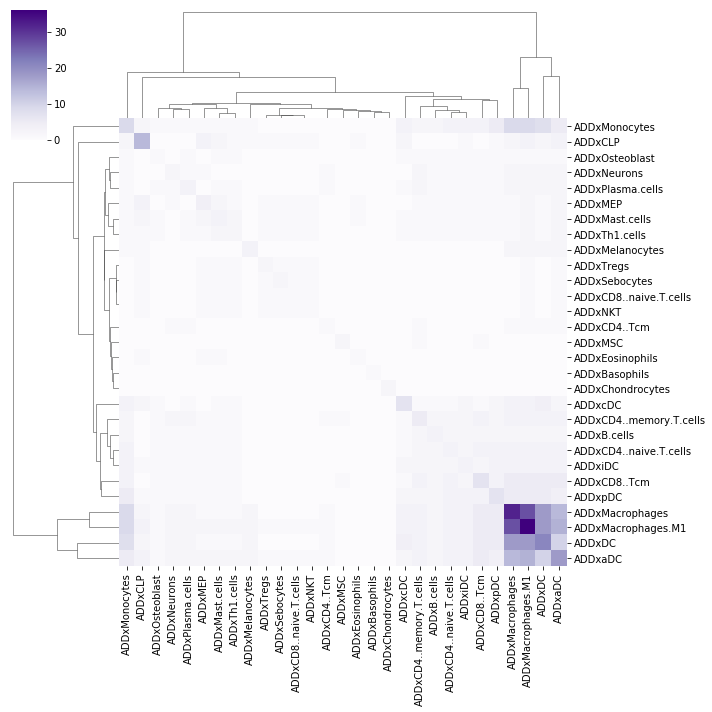

In [29]:
f=plt.figure(figsize=(20,20))
ax=sns.clustermap(df_expand,cmap="Purples")
plt.savefig("../plots/tcga.xcell.int.overlap.pdf")

In [64]:
cell_interact_sig["pheno"]=cell_interact_sig["assoc"].str.split("_").str[1]

In [79]:
cell_interact_sig["cell"].value_counts().index.tolist()[0:5]

['ADDxMacrophages.M1', 'ADDxMacrophages', 'ADDxDC', 'ADDxaDC', 'ADDxCLP']

In [75]:
cell_interact_sig_pheno=cell_interact_sig.groupby(["pheno","cell"]).size().reset_index()

In [81]:
cell_interact_sig_pheno=cell_interact_sig_pheno[cell_interact_sig_pheno["cell"].isin(cell_interact_sig["cell"].value_counts().index.tolist()[0:5])]

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

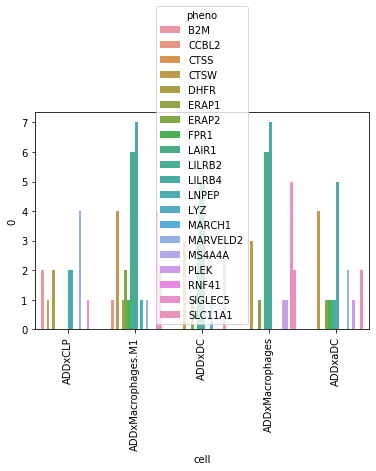

In [84]:
sns.barplot(x="cell",y=0,hue="pheno",data=cell_interact_sig_pheno)
plt.xticks(rotation=90)

In [62]:
cell_interact_sig[cell_interact_sig["cell"]=="ADDxMelanocytes"]

,assoc,fdr,cell
193,19:55175983:T:A_LILRB4,0.015107,ADDxMelanocytes
196,19:55188593:G:C_LILRB4,0.015107,ADDxMelanocytes
272,3:48516525:A:T_TREX1,0.015107,ADDxMelanocytes


In [30]:
cov=[]
num=[]

for x in ax.data2d.columns.tolist():
    cov.append(x)
    num.append(len(cell_interact_sig[cell_interact_sig["cell"]==x]))

In [31]:
df_bar=pd.DataFrame({"cov":cov,"num":num})

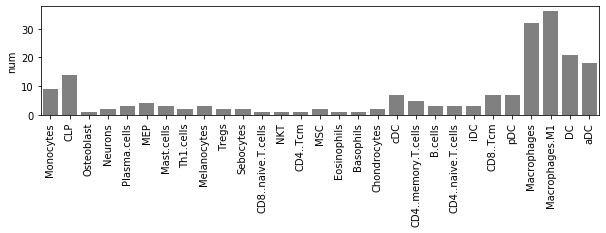

In [32]:
f=plt.figure(figsize=(10,2))
sns.barplot([x.split("ADDx")[1] for x in df_bar["cov"]],df_bar["num"],color="gray")
plt.xticks(rotation=90)
plt.savefig("../plots/tcga.xcell.num.pdf")